<a href="https://colab.research.google.com/github/yavuzkuk/Mnist-Dataset/blob/main/Mnist_DenseNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras.layers.regularization.spatial_dropout3d import Dropout
from keras.layers.rnn.base_rnn import DropoutRNNCellMixin

In [2]:
(train_img,train_label),(test_img,test_label) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
from keras.utils import to_categorical
from numpy import expand_dims
train_img = train_img/255.
test_img = test_img/255.

train_img = train_img.astype("float")
test_img = test_img.astype("float")

train_img = expand_dims(train_img,axis=-1)
test_img = expand_dims(test_img,axis=-1)

train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [4]:
from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,kernel_size=(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))


In [5]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

In [6]:
history = model.fit(train_img,train_label,epochs=10,batch_size=128)

Epoch 1/10
469/469 [==============================] - 220s 454ms/step - loss: 0.1236 - accuracy: 0.9639
Epoch 2/10
469/469 [==============================] - 210s 448ms/step - loss: 0.0427 - accuracy: 0.9869
Epoch 3/10
469/469 [==============================] - 208s 443ms/step - loss: 0.0288 - accuracy: 0.9911
Epoch 4/10
469/469 [==============================] - 207s 442ms/step - loss: 0.0234 - accuracy: 0.9924
Epoch 5/10
469/469 [==============================] - 211s 450ms/step - loss: 0.0193 - accuracy: 0.9938
Epoch 6/10
469/469 [==============================] - 211s 449ms/step - loss: 0.0155 - accuracy: 0.9951
Epoch 7/10
469/469 [==============================] - 210s 449ms/step - loss: 0.0151 - accuracy: 0.9949
Epoch 8/10
469/469 [==============================] - 220s 469ms/step - loss: 0.0131 - accuracy: 0.9957
Epoch 9/10
469/469 [==============================] - 221s 472ms/step - loss: 0.0102 - accuracy: 0.9966
Epoch 10/10
469/469 [==============================] - 219s 466m

In [7]:
loss , accuracy = model.evaluate(test_img,test_label)

313/313 [==============================] - 9s 29ms/step - loss: 0.0296 - accuracy: 0.9926


In [10]:
lossTable = history.history["loss"]
accuracyTable = history.history["accuracy"]

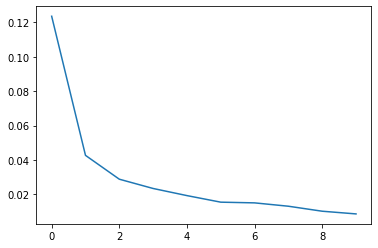

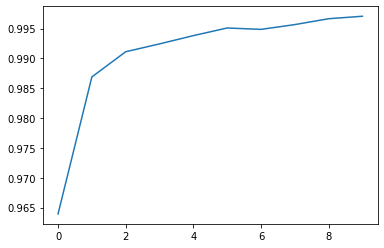

In [11]:
import matplotlib.pyplot as plt


plt.plot(range(len(lossTable)),lossTable)
plt.show()

plt.plot(range(len(accuracyTable)),accuracyTable)
plt.show()